In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance as pn   # ← PyNance


In [4]:
# Load your stock data (YOU MUST PLACE YOUR FILE IN THE SAME FOLDER)
df = pd.read_csv("../src/AMZN.csv")

# Standardize column names (important)
df.columns = df.columns.str.title()

# Make sure required columns exist
required_cols = ["Open", "High", "Low", "Close", "Volume"]
print("Found columns:", df.columns.tolist())

missing = [col for col in required_cols if col not in df.columns]
if missing:
    print("❌ Missing columns:", missing)
else:
    print("✅ All required columns found.")

# Convert Date column
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")
else:
    print("⚠️ No Date column found.")


Found columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
✅ All required columns found.


In [7]:
# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

# RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2
)

# Stochastic Oscillator
df['slowk'], df['slowd'] = talib.STOCH(
    df['High'], df['Low'], df['Close'],
    fastk_period=14,
    slowk_period=3,
    slowd_period=3
)

print("✅ Technical indicators calculated!")
df.head()


✅ Technical indicators calculated!


,Date,Close,High,Low,Open,Volume,Returns,Volatility_20,Sharpe,Cumulative_Returns,...,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,upper_band,middle_band,lower_band,slowk,slowd
0,2009-01-02,2.718,2.7265,2.5535,2.5675,145928000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,2.703,2.7870,2.6515,2.7865,190196000,-0.005519,NaN,NaN,0.994481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,2.868,2.9110,2.6875,2.7275,221602000,0.061043,NaN,NaN,1.055188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,2.810,2.8475,2.7675,2.8145,158854000,-0.020223,NaN,NaN,1.033848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,2.858,2.8660,2.7290,2.7495,131558000,0.017082,NaN,NaN,1.051509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Daily returns
# FIXED: Using the standard pandas method .pct_change()
df["Returns"] = df["Close"].pct_change()

# Rolling volatility (20-day)
df["Volatility_20"] = df["Returns"].rolling(20).std()

# Sharpe Ratio (simplified)
# Note: This is an unannualized, simplified 20-day Sharpe Ratio
df["Sharpe"] = df["Returns"].rolling(20).mean() / df["Returns"].rolling(20).std()

# Cumulative returns
df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod()

print("✅ Financial metrics added using pandas!")
print(df.tail())

✅ Financial metrics added using pandas!
           Date       Close        High         Low        Open    Volume  \
3769 2023-12-22  153.419998  154.350006  152.710007  153.770004  29514100   
3770 2023-12-26  153.410004  153.979996  153.029999  153.559998  25067200   
3771 2023-12-27  153.339996  154.779999  153.119995  153.559998  31434700   
3772 2023-12-28  153.380005  154.080002  152.949997  153.720001  27057000   
3773 2023-12-29  151.940002  153.889999  151.029999  153.100006  39823200   

       Returns  Volatility_20    Sharpe  Cumulative_Returns  
3769 -0.002730       0.011908  0.192768           56.445917  
3770 -0.000065       0.011871  0.164672           56.442240  
3771 -0.000456       0.011782  0.184085           56.416483  
3772  0.000261       0.011678  0.207527           56.431203  
3773 -0.009388       0.011946  0.170147           55.901400  


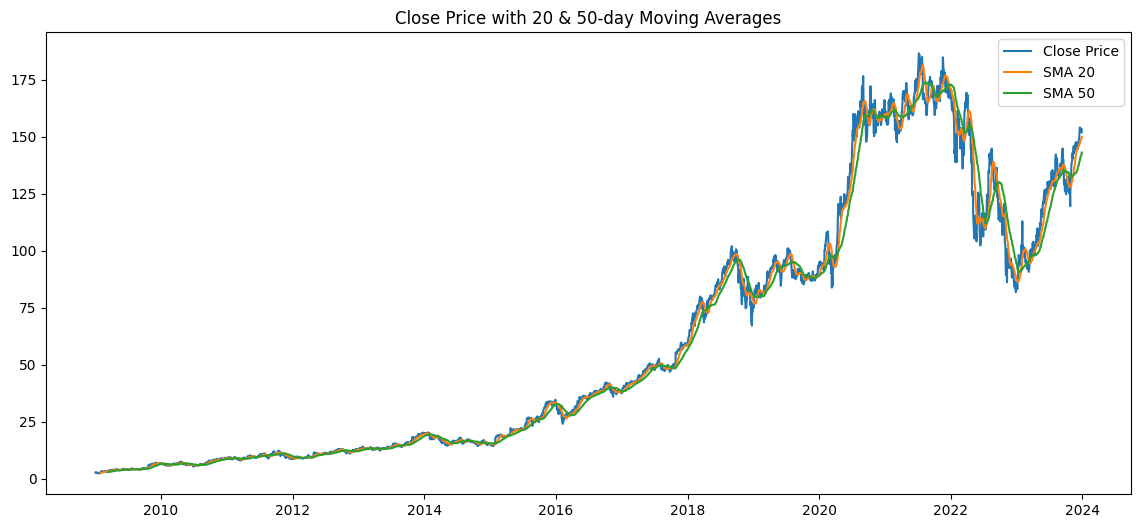

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
plt.title("Close Price with 20 & 50-day Moving Averages")
plt.legend()
plt.show()


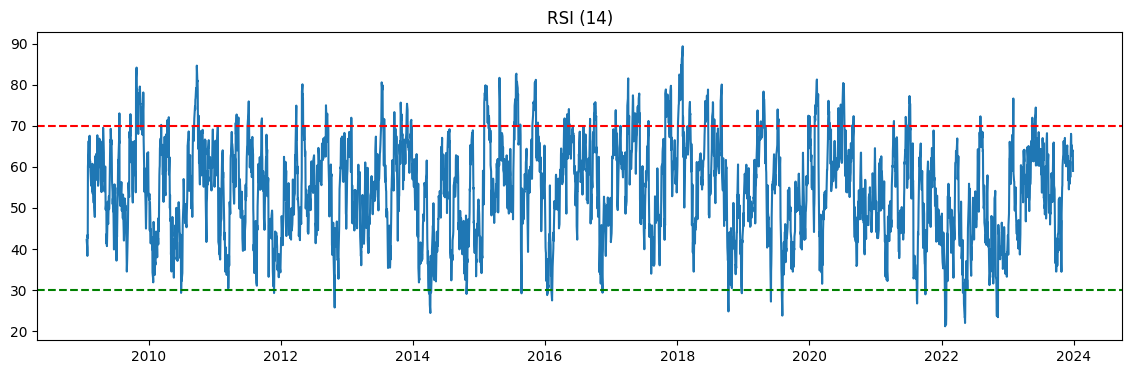

In [9]:
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14)")
plt.show()


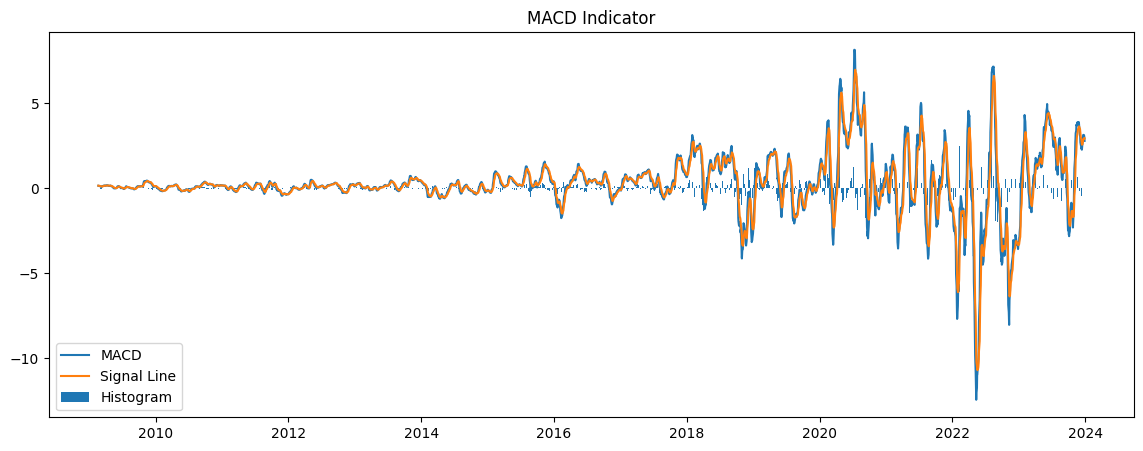

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["MACD"], label="MACD")
plt.plot(df["Date"], df["MACD_signal"], label="Signal Line")
plt.bar(df["Date"], df["MACD_hist"], label="Histogram")
plt.title("MACD Indicator")
plt.legend()
plt.show()


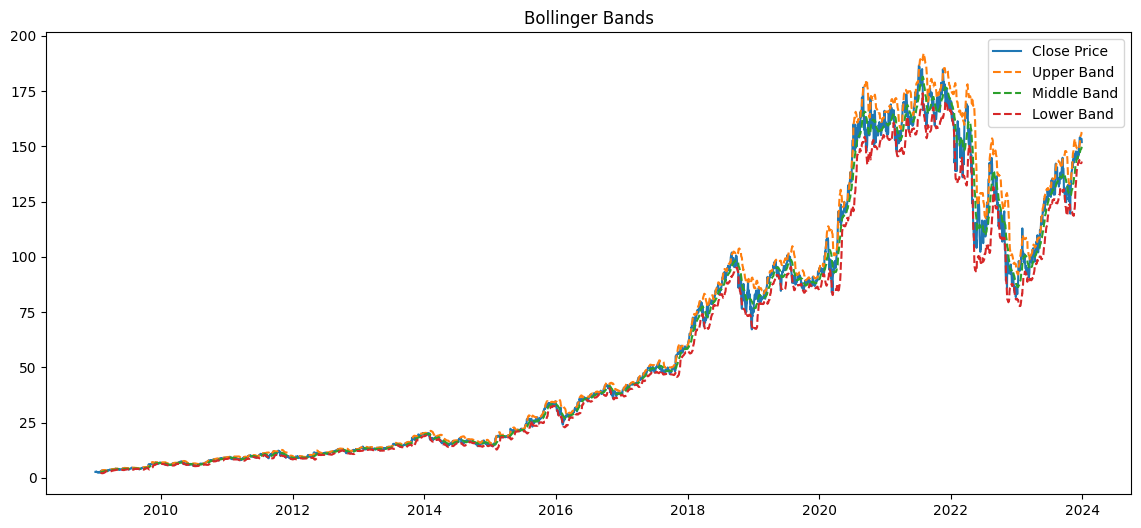

In [11]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["upper_band"], label="Upper Band", linestyle="--")
plt.plot(df["Date"], df["middle_band"], label="Middle Band", linestyle="--")
plt.plot(df["Date"], df["lower_band"], label="Lower Band", linestyle="--")
plt.title("Bollinger Bands")
plt.legend()
plt.show()


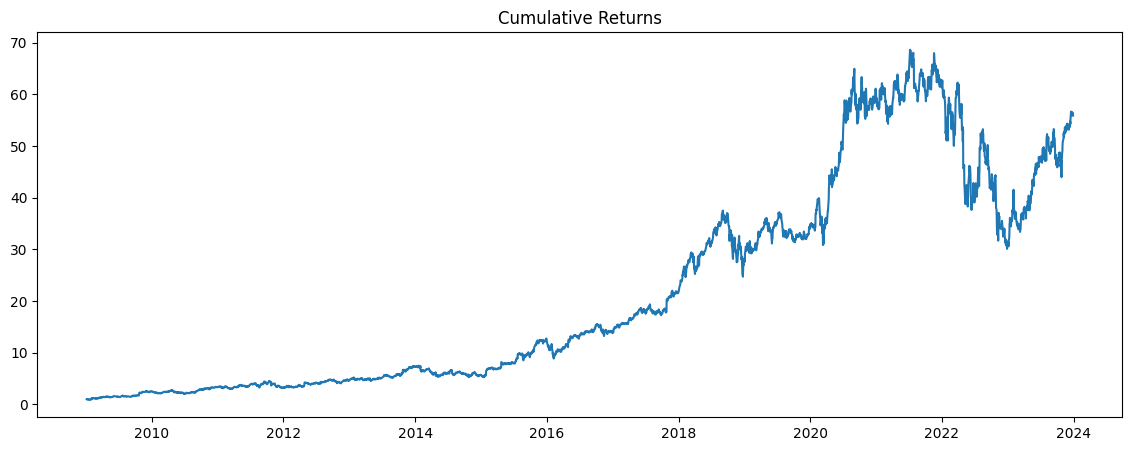

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Cumulative_Returns"])
plt.title("Cumulative Returns")
plt.show()


In [13]:
summary = df[[
    "Close", "SMA_20", "SMA_50", "RSI_14",
    "MACD", "MACD_signal", "Volatility_20", "Sharpe"
]].tail(10)

summary


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,Volatility_20,Sharpe
3764,149.970001,146.650000,138.8954,62.090387,2.357466,2.554335,0.011693,0.214399
3765,154.070007,147.094501,139.4176,68.053721,2.731655,2.589799,0.012594,0.242262
3766,153.789993,147.477500,139.9282,67.275369,2.971356,2.666110,0.012611,0.208791
3767,152.119995,147.888500,140.3810,62.671579,2.992074,2.731303,0.012317,0.231636
3768,153.839996,148.245000,140.8212,65.305020,3.111417,2.807326,0.011860,0.205906
3769,153.419998,148.578999,141.2430,64.115558,3.135958,2.873052,0.011908,0.192768
3770,153.410004,148.863000,141.7154,64.085644,3.118650,2.922172,0.011871,0.164672
3771,153.339996,149.178500,142.1312,63.860893,3.063965,2.950530,0.011782,0.184085
3772,153.380005,149.531499,142.5694,63.938728,2.989395,2.958303,0.011678,0.207527
3773,151.940002,149.824000,143.0456,59.012257,2.782032,2.923049,0.011946,0.170147
